# Scientific computations in Python

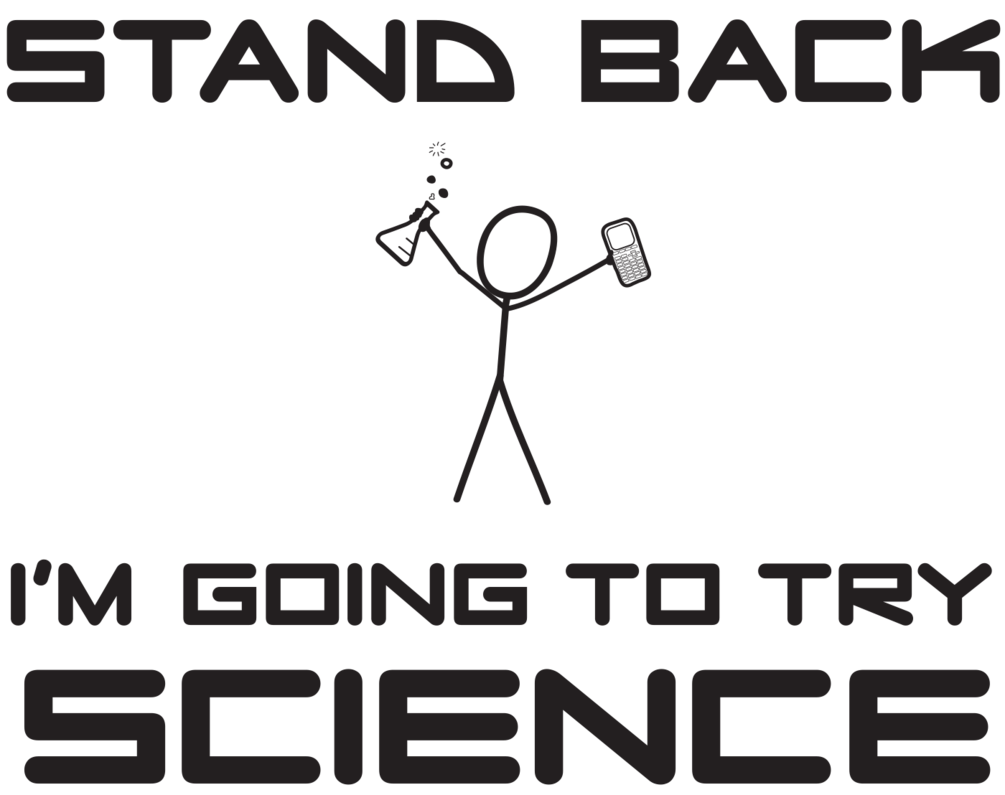
**Image Credit: [XKCD](https://www.XKCD.com)**

# The SciPy Stack

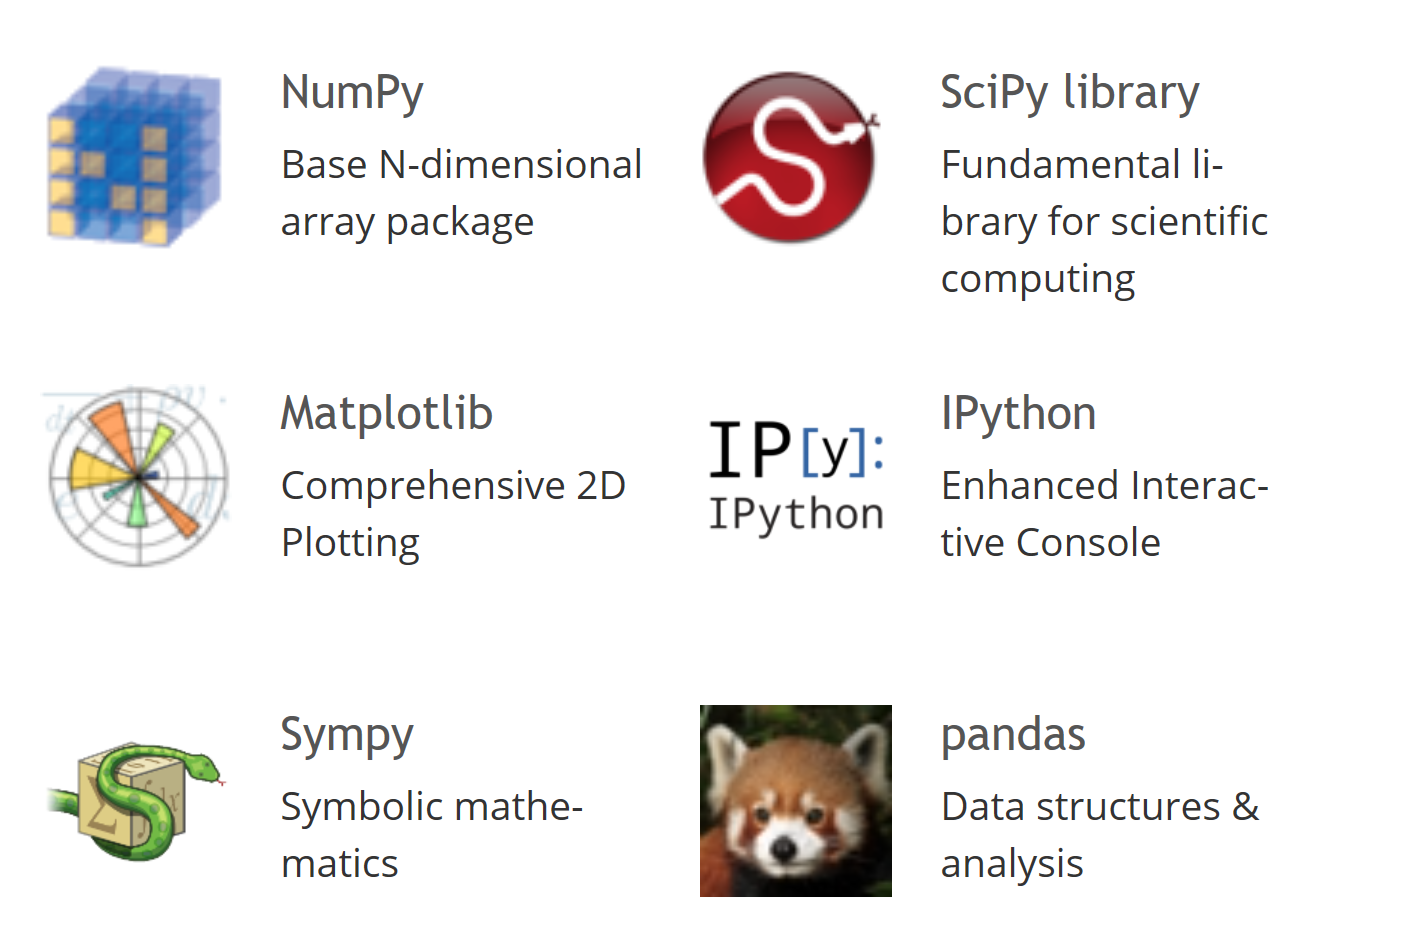

# Numpy
*Say goodby to For loops*

## The numpy array
- homogeneous multidimensional "table" of (typically) numbers
- numpy intern an object of class *ndarray*
- array is indexed by tuple of integers, each dimension is an *axis*
- can have as many axis and thus dimensions as needed




### Example 2-d array

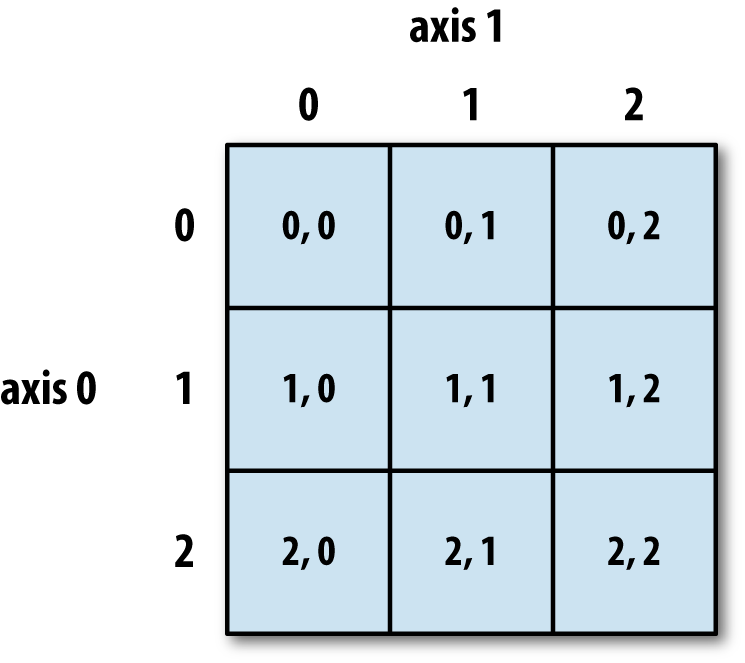

In [ ]:
import numpy as np

# This is a 1d array:
a = np.array([1,2,3])
print("1d array: ",a)

In [ ]:
# This is a 2d array:
b = np.array([[1,2,3],[3,4,5]])
print("2d array:")
print(b)

In [ ]:
# This is a 3d array:
c = np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])
print("3d array:")
print(c)

- the last axis is printed from left to right,
- the second-to-last is printed from top to bottom,
- the rest are also printed from top to bottom, with each slice separated by an empty line.


### The morphology of an array

In [ ]:
print("1d array")
print("Number of axes: ",a.ndim) 
print("length of each axis: ",a.shape) 

In [ ]:
print("2d array")
print("Number of axes: ",b.ndim) 
print("length of each axis: ",b.shape) 

In [ ]:
print("3d array")
print("Number of axes: ",c.ndim) 
print("length of each axis: ",c.shape) 
print("total number of elements: ",c.size)
print("data type of elements: ", c.dtype)

### Creating Numpy arrays

In [ ]:
a = np.arange(6) # creating a 1d array with integers from 0 to 5
print(a)

In [ ]:
b = np.arange(12).reshape(4,3) # 2d array with shape (4,3)
print(b)

In [ ]:
c_0 = np.zeros((4,3)) # 2d array of shape (4,3) filled with zeros
print(c_0)

In [ ]:
c_1 = np.ones((4,3)) # 2d array of shape (4,3) filled with ones
print(c_1)

## Indexing, slicing and iterating




In [ ]:
print(a)
print("1st element:")
a[0] # give the first element in the 1d array a

In [ ]:
print("lets get the last element:")
a[-1]

In [ ]:
print("lets get a slice of the array:")
a[1:3] # give a subarray between the 2nd and 4th element (excluding the upper bound) 

### Slicing of 2d arrays:
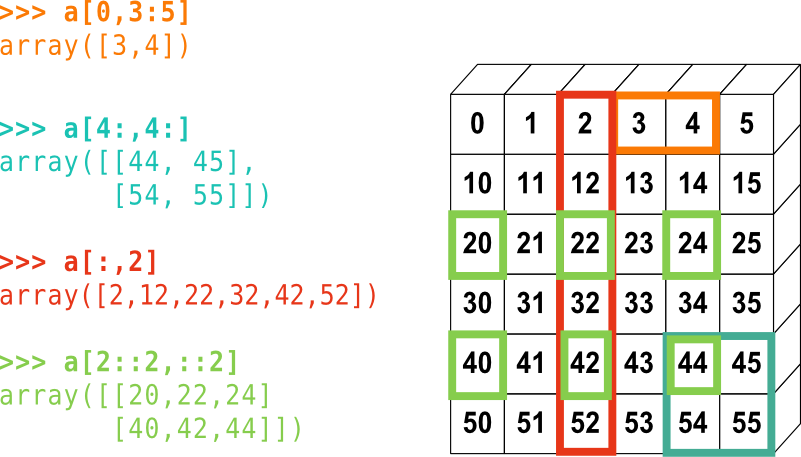

### Iterating over an array

In [ ]:
for i in a:
    print(i**(1/3.))

In [ ]:
# Multidimensional arrays iterate over the first axis
for row in b: 
    print(row)

## Shape manipulation and stacking

In [ ]:
# Lets remind ourselfes of this 2d array
print(b) 

In [ ]:
# Lets make a 1d array out of it:
print("2d array 'b' flattened into a 1d array:")
b.ravel()

In [ ]:
# Lets give the array a new shape
print("(4,3) array transformed into (6,2) array:")
b.reshape((6,2)) 

In [ ]:
# Finally lets transpose the array
print("Transposed array b:")
b.T

## Universal Functions (uFuncs)

- a function that operates on a *ndarray* type object
- operates element wise
- supports type casting, i.e. python will try to make non matching data types work
- supports broadcasting, i.e. python will try to make different array shapes work
- backend typically coded in *C* for high performance
- most mathematical functions are available
- there is a toolkit available to write your own

In [1]:
import numpy as np

# Lets create a 4x3 Numpy array
a = np.arange(12).reshape(4,3)
print(a)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [3]:
# We can do all kinds of manipulation now
b = np.sin(a) # will compute the sin of each element in the array
c = a - 1.2 # will subtract 1.2 from each element in the array

print("sin(a): ")
print(b)

# We have now used type casting, our array contained integers and we subtracted a float

print("a - 1.2 elemnt wise: ")
print(c)

sin(a): 
[[ 0.          0.84147098  0.90929743]
 [ 0.14112001 -0.7568025  -0.95892427]
 [-0.2794155   0.6569866   0.98935825]
 [ 0.41211849 -0.54402111 -0.99999021]]
a - 1.2 elemnt wise: 
[[-1.2 -0.2  0.8]
 [ 1.8  2.8  3.8]
 [ 4.8  5.8  6.8]
 [ 7.8  8.8  9.8]]


### Rules of Broadcasting

- All input arrays with ndim smaller than the input array of largest ndim, have 1’s prepended to their shapes
- The size in each dimension of the output shape is the maximum of all the input sizes in that dimension
- An input can be used in the calculation if its size in a particular dimension either matches the output size in that dimension, or has value exactly 1
- If an input has a dimension size of 1 in its shape, the first data entry in that dimension will be used for all calculations along that dimension

### Broadcasting
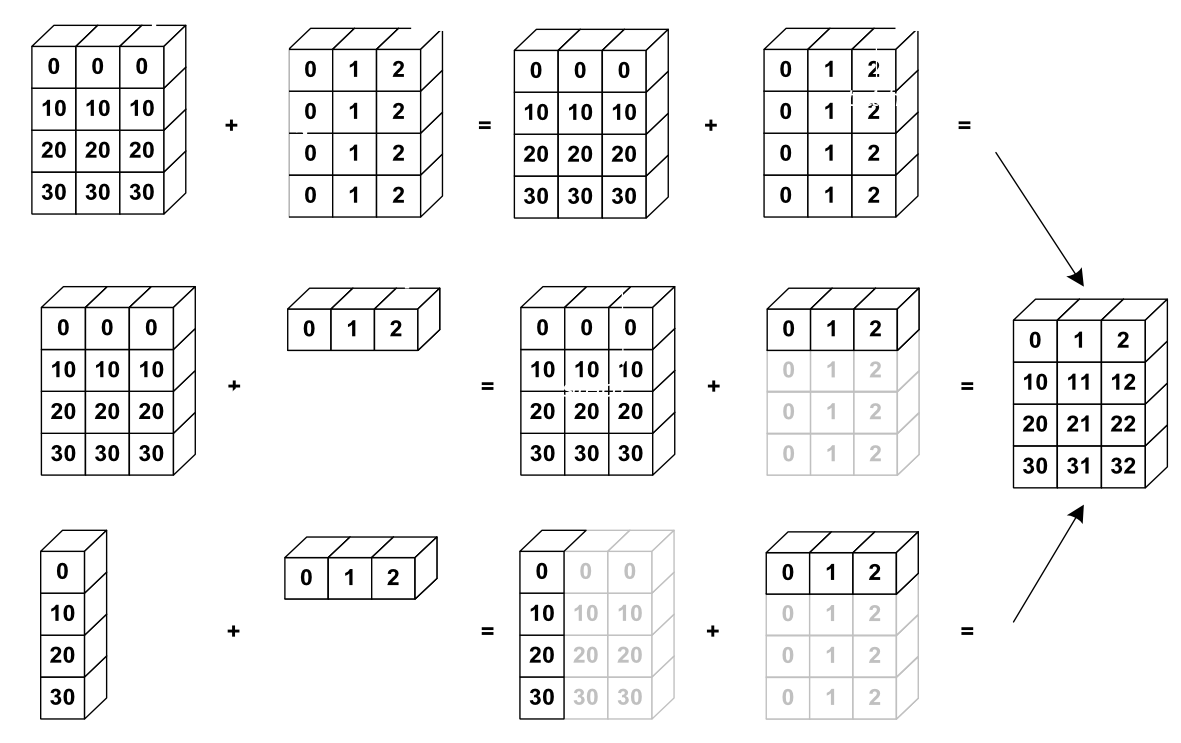

## Why do we care?

## To go from the left to the right!
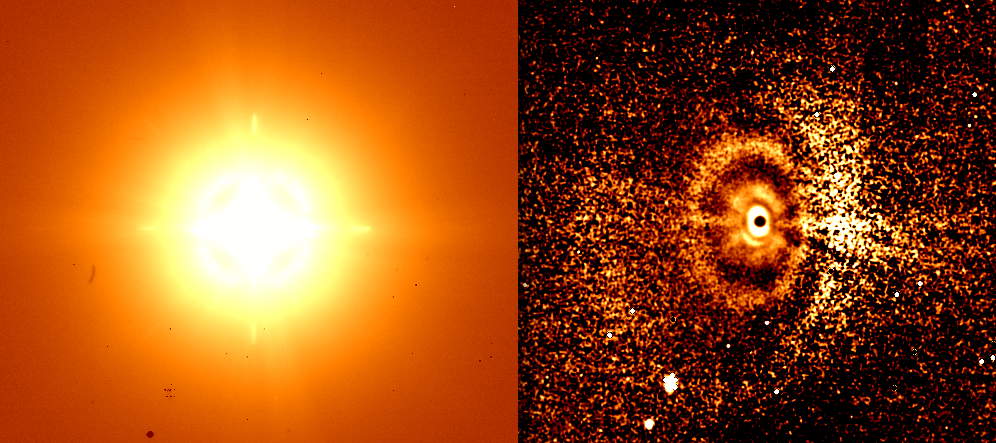

# Reading and writing data

## Text files

In [ ]:
data = open("./data/my_data_file", "r")
lines = data.readlines()
data.close()

data_list=[]

for line in lines:
    data_list.append(float(line))

print("This is our list:", data_list)

# Now lets write the data back out into a file in the same formating it had before

output_file = open("./data/my_shiny_new_file","w")
    
for element in data_list:
    output_file.writelines(str(element) + "\n")

# Make sure to close your file so that the data is actually written out!
output_file.close()

## Astronomical data files (.fits)

- .fits files are the standard data format in most astronomical fields
- they can contain images as well as tabular data
- they contain a "header" with meta-data such as the instrument settings for images
- they can have multiple "extensions" and dimensions, e.g. two images taken simultaneously with two cameras could be in two extensions of a .fits file and each of these images could consist of many short exposures making it a 3 dimensional data cube

In [ ]:
import astropy.io.fits as fits

fits_file = fits.open("./data/rxj1615_disk.fits")

# We want to acces the first extension of the fits file, thus we ask for fits_file[0]
# Each extension comes with a data and a meta-data part (data and header)
# The data part of extension 0 can itself be a 3 dimensional data "cube" with many 2d images

metadata_header = fits_file[0].header
sci_data_array = fits_file[0].data

# What data type is "sci_data_array?

print(type(sci_data_array))

#print("Number of axis of our image data: ", sci_data_array.ndim)
#print("Shape of our image data: ", sci_data_array.shape)


# Now we can do all kinds of manipulation with the data using Numpy and other modules
# When we are done we write the data back into a new .fits file

#fits.writeto("./data/my_new_data_file.fits", sci_data_array, metadata_header)



# Matplotlib
*"Make easy things easy and hard things possible"*

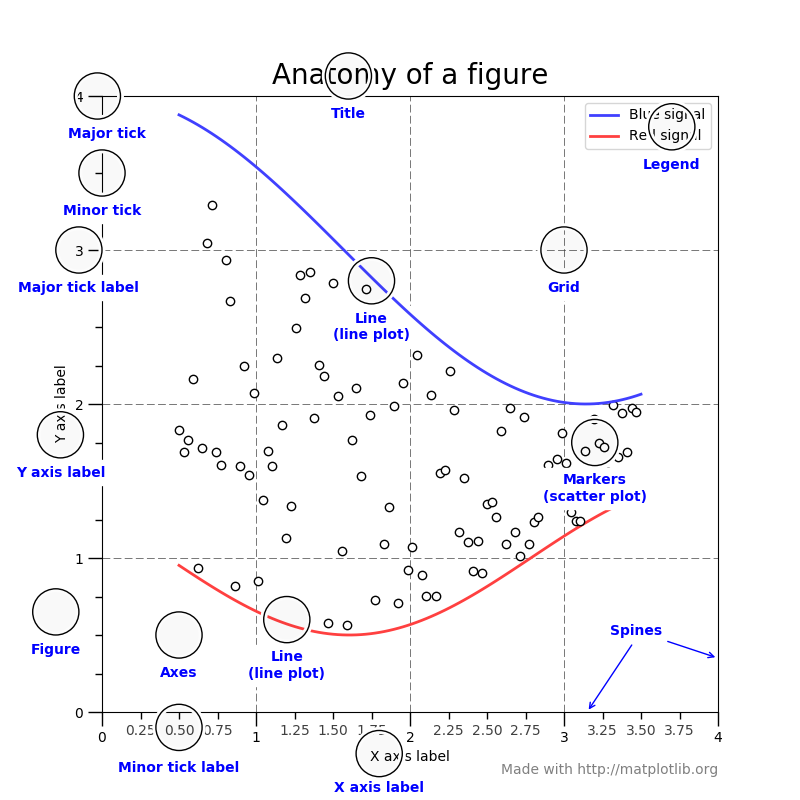

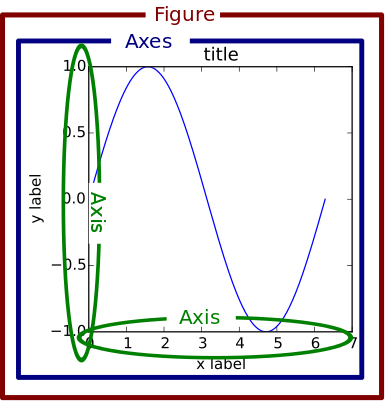


## Line and scatterplots

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Create some data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)
#ax.plot(t, s, "k--")
#ax.plot(t, s, "--", linewidth=6, color = '#187E03')

ax.set(xlabel='x-axis label', ylabel='y-axis label',title='This is a line plot')
#ax.set_xlabel("$\mathbf{\Delta RA  \ [arcsec]}$", fontsize=22)    
#ax.set_ylabel("$\mathbf{\Delta Dec  \ [arcsec]}$", fontsize=20) 

#ax.grid()

#fig.savefig("test.png")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

fig, ax = plt.subplots()
ax.set(xlabel='x-axis label', ylabel='y-axis label',title='This is a scatter plot')

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

## Subplots

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1) # we are telling subplot that we want two rows, one column, and this is the first plot
plt.plot(x1, y1, 'o-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

## Histograms

In [ ]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak the spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

## Images

In [ ]:
import astropy.io.fits as pyfits
image_file = pyfits.open("rxj1615_disk.fits")
data_array = image_file[0].data

fig = plt.figure()
fig, ax = plt.subplots()

#plt.imshow(data_array)

# Lets optimize a little bit! 
# The image has a size of 12.6 arc seconds on the sky, so we tell this to imshow.
# But we want only the inner 2.8 arcsec shown and in a more appealing color map. 
# We also want to use -10 and 40 as extreme values of the color map.

ax.set_xlim([-1.4,1.4])    
ax.set_ylim([-1.4,1.4]) 
plt.imshow(data_array, origin='lower', extent=[-6.3,6.3,-6.3,6.3], cmap=plt.cm.gist_heat , vmin=-10, vmax=40) 




## Contouring and pseudocolors

In [ ]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y) # make a grid of data points that is spanned by the x and y vector

def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

Z = f(X,Y)

# Lets have a look:
#plt.imshow(Z, interpolation='bilinear', origin='lower',cmap=cm.gray, extent=(-3, 3, -2, 2))

# Create a simple contour plot with labels using default colors.  
# The inline argument to clabel will control whether the labels are draw
# over the line segments of the contour, removing the lines beneath the label

#plt.figure()
#CS = plt.contour(X, Y, Z)
#plt.clabel(CS, inline=1, fontsize=10)
#plt.title('Simplest default with labels')
#plt.imshow(Z, interpolation='bilinear', origin='lower',cmap=cm.gray, extent=(-3, 3, -2, 2))

## 3d-plots

In [ ]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D 

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

# Create some example data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

## XKCD style ("hand drawn") plots

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

with plt.xkcd():
    # Based on "Stove Ownership" from XKCD by Randall Monroe
    # http://xkcd.com/418/

    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    plt.xticks([])
    plt.yticks([])
    ax.set_ylim([-30, 10])

    data = np.ones(100)
    data[70:] -= np.arange(30)

    plt.annotate(
        'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
        xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

    plt.plot(data)

    plt.xlabel('time')
    plt.ylabel('my overall health')
    fig.text(
        0.5, 0.05,
        '"Stove Ownership" from xkcd by Randall Monroe',
        ha='center')



## Pie charts
**NO!**

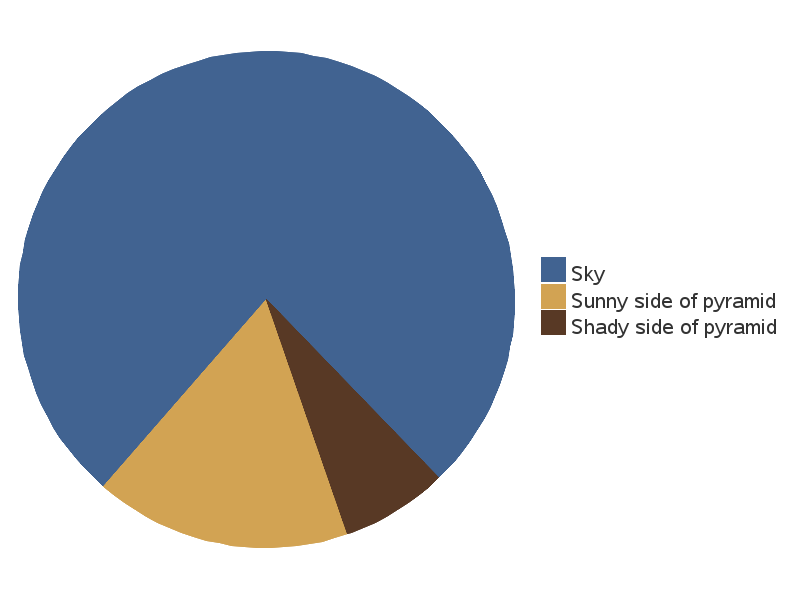